In [1]:
import pandas as pd
import numpy as np

# Task 1

>(1.1.) Check for missing values in the dataset and handle them \[...\].

>(1.2.) Check the dataset for noisy data, inconsistencies, and duplicate entries \[...\].

# Subtask 1.1. Checking for missing values and handling them

Recall that missing values are denoted by "?". An imputation is necessary to complete these and any potential null values.

### Step 1. Creating a Dataframe

Let us initiate the dataframe with the first 5000 rows.

In [2]:
# Store the first 5000 rows as a dataframe (and print it)
ds = pd.read_csv('adult.csv')
sp_ds = ds[:5000]
df = pd.DataFrame(sp_ds)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Step 2. Counting the missing values

As we can see, there are missing values in the form of question marks ("?").

Let us [count](https://stackoverflow.com/questions/20076195/) these missing values.

In [3]:
# Stack all values and count the question marks
column_names = ["age", "workclass", "fnlwgt", "education", "educational-num", "marital-status", "occupation", "relationship", "race", "gender", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
df[[i for i in column_names]].astype('str').stack().value_counts()['?'].sum()

707

### Step 3. Counting the Null values

As seen above, there are 707 missing values in total.

Let us count the null values (if any):

In [4]:
# Check for null values
df.isnull().sum().sum()

0

### Step 4. Listing the affected columns (variables)

So there are no null values.

As for the 707 missing values found earlier, we need to know how to impute them. Let us [find](https://stackoverflow.com/questions/50923707) the columns that contain missing values.

In [5]:
# List the columns that contain a question mark value
df.columns[df.isin(['?']).any()]

Index(['workclass', 'occupation', 'native-country'], dtype='object')

### Step 5. Determining their most frequent category

The 707 missing values are distributed over three variables. All three of these are nominal variables.

For now, we will impute them using the most frequent category. Since the 707 missing values are distributed over a total of 5'000x3 = 15'000 values, this simple imputation method should not significantly affect the data.

Let us first find out the most frequent category in each variable.

In [6]:
# Count most frequent value in "workclass"
df.workclass.value_counts().head(1)

workclass
Private    3420
Name: count, dtype: int64

In [7]:
# Count most frequent value in "occupation"
df.occupation.value_counts().head(1)

occupation
Prof-specialty    644
Name: count, dtype: int64

In [8]:
# Count most frequent value in "native-country"
df['native-country'].value_counts().head(1)

native-country
United-States    4514
Name: count, dtype: int64

### Step 6. Imputing with their most frequent category

Now we know that the most frequent categories are the Private sector, the "Prof-specialty" occupation, and the country United States.

Let us replace the missing values with the respective most frequent category.

In [9]:
# Workclass : Replace question marks
df.workclass.replace('?','Private', inplace=True)
# Count most frequent value again
df.workclass.value_counts().head(1)

workclass
Private    3735
Name: count, dtype: int64

In [10]:
# Occupation : Replace question marks
df.occupation.replace('?','Prof-specialty', inplace=True)
# Count most frequent value again
df.occupation.value_counts().head(1)

occupation
Prof-specialty    959
Name: count, dtype: int64

In [11]:
# Native-country : Replace question marks
df['native-country'].replace('?','United-States', inplace=True)
# Count most frequent value again
df['native-country'].value_counts().head(1)

native-country
United-States    4591
Name: count, dtype: int64

### Step 7. Checking that the missing values are handled

As expected, the most frequent categories became even more frequent. Let us check for missing values again.

In [12]:
# List the columns that contain a question mark value
df.columns[df.isin(['?']).any()]

Index([], dtype='object')

# Subtask 1.2. Checking for noisy data, inconsistencies & duplicate entries

## Subtask 1.2.1 Checking for noisy data

Some definitions for noisy data include: Data that is corrupted/distorted & Data that has a low signal-to-noise ratio.

While the latter can be [measured using a formula](https://en.wikipedia.org/wiki/Signal-to-noise_ratio), checking for corrupted and distorted data will need manual examination.

### Step 1. Finding corrupted data

[There are 8 nominal variables in our data.](http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html) Corrupted values are likely to hide in their rarest categories.

Let us search for corrupted data, by listing rare categories in non-number variables, treating "native-country" separately since it has especially many categories.

In [13]:
# Stack values in said non-number variables and show the rarest categories
non_num_column_names = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "gender"]
print(df[[i for i in non_num_column_names]].astype('str').stack().value_counts().tail())
print()
print(df[['native-country']].astype('str').stack().value_counts().tail())

1st-4th              24
Preschool            13
Married-AF-spouse     3
Without-pay           2
Armed-Forces          1
Name: count, dtype: int64

Laos                          1
Hong                          1
Trinadad&Tobago               1
Outlying-US(Guam-USVI-etc)    1
France                        1
Name: count, dtype: int64


Examining these values reveals no corrupted information except for typing errors in the country names of Hong Kong and Trinidad&Tobago. However, the typing errors do not affect the usefulness of the data, as each country is represented by only one category.

### Step 2. Finding distorted data

[Our data has 6 continous variables.](http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html) They are "age", "fnlwgt" (finalweight), "educational-num", "capital-gain", "capital-loss", and "hours-per-week". For the first five, there exists a distribution plot in our first presentation. As for "hours-per-week", a plot has been generated below.

Considering all of these plots, there is only one obvious distortion: Age 90 is more represented than the other ages in that range. We assume that this is an intended grouping of ages 90+ that has been made in the original data. Therefore it does not negatively affect the quality of the dataset

<Axes: ylabel='Frequency'>

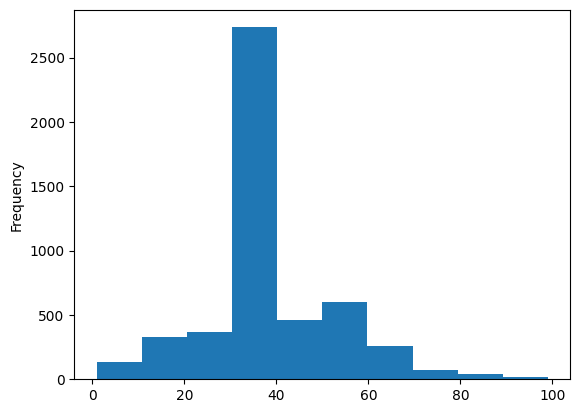

In [14]:
df['hours-per-week'].plot.hist()

### Step 3. Finding data with a low signal-to-noise ratio

## Subtask 1.2.2 Checking for inconsistencies

## Subtask 1.2.3 Checking for duplicates